In [1]:
print("Hello World!")

Hello World!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df1 = pd.read_csv("ttrain.csv")

In [4]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df1.shape

(891, 12)

In [6]:
df2 = pd.read_csv("ttest.csv")

In [7]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df = df1.append(df2) # merged

In [9]:
df.shape

(1309, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [11]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
#fill age, embarked, fare; drop cabin
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [13]:
#embarked counts
df.Embarked.value_counts(normalize = True)

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [14]:
#embarked filled with highest one
df['Embarked'] = df['Embarked'].fillna('S')

In [15]:
#cabin deleted cause of no need
del df["Cabin"]

In [16]:
#Titles seperated from names
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

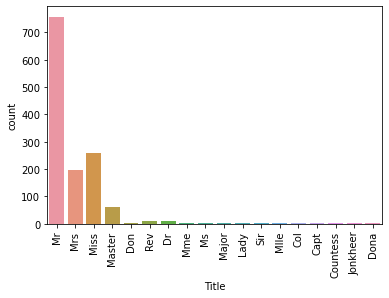

In [22]:
sns.countplot(df['Title'])
plt.xticks(rotation=90);

In [23]:
#Unnecessary Titles replaced
df['Title'] = df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title'] = df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title'] = df['Title'].replace(['Dr','Major','Col','Sir','Rev','Jonkheer','Capt','Don','Master'],'Mr')

In [24]:
#age averages used to fill in the age data
df.groupby("Title")["Age"].mean()

Title
Miss    21.824366
Mr      30.613171
Mrs     36.971264
Name: Age, dtype: float64

In [25]:
#age filled with Median 
df["Age"].fillna(df.groupby("Title")["Age"].transform("median"), inplace = True)

In [26]:
#fare filled with Mean
df['Fare'].fillna(df['Fare'].mean(), inplace = True)

In [28]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [29]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
5,6,0.0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,Mr
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Mr
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mrs
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs


In [30]:
df['Family'] = df['SibSp'] + df['Parch'] + 1 

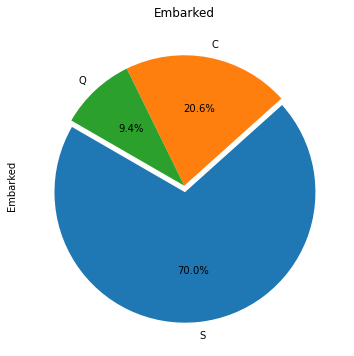

In [34]:
plt.figure(figsize=(6,6))
explode=(0.05,0,0)
df['Embarked'].value_counts().plot.pie(autopct='%1.1f%%',startangle = 150, explode=explode)
plt.title('Embarked');

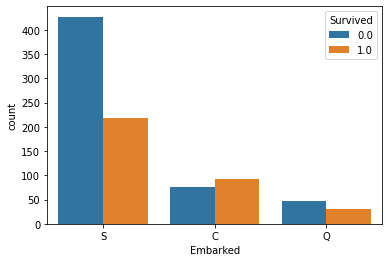

In [36]:
sns.countplot(x = 'Embarked',hue = 'Survived', data = df);

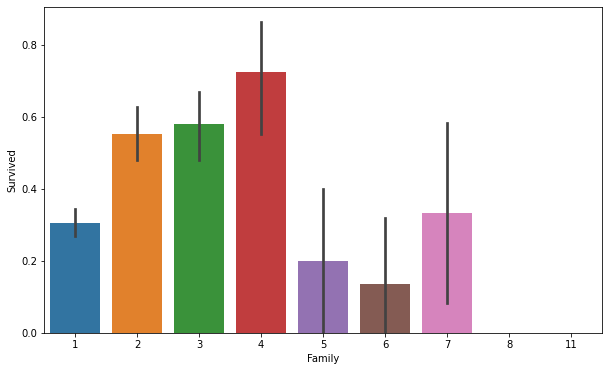

In [40]:
plt.figure(figsize = (10,6))
sns.barplot(x = df['Family'], y = df['Survived']);

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
 11  Title        1309 non-null   object 
 12  Family       1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,1


In [44]:
df.drop(['PassengerId','Ticket'],axis=1,inplace=True)

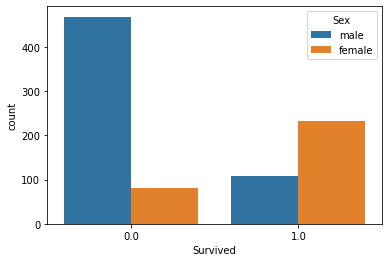

In [46]:
sns.countplot(x='Survived', data=df,hue='Sex');

In [47]:
#female more likely to survive
df['Sex'] = df['Sex'].map({'female':1,'male':0}).astype(int)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   int32  
 4   Age       1309 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Fare      1309 non-null   float64
 8   Embarked  1309 non-null   object 
 9   Title     1309 non-null   object 
 10  Family    1309 non-null   int64  
dtypes: float64(3), int32(1), int64(4), object(3)
memory usage: 149.9+ KB


In [49]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,Mr,2
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,Mrs,2
2,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,Miss,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,Mrs,2
4,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,Mr,1


In [55]:
df.drop(['Name'],axis=1,inplace=True)

In [56]:
df_dummies=pd.get_dummies(df,drop_first=True)

In [57]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Sex         1309 non-null   int32  
 3   Age         1309 non-null   float64
 4   SibSp       1309 non-null   int64  
 5   Parch       1309 non-null   int64  
 6   Fare        1309 non-null   float64
 7   Family      1309 non-null   int64  
 8   Embarked_Q  1309 non-null   uint8  
 9   Embarked_S  1309 non-null   uint8  
 10  Title_Mr    1309 non-null   uint8  
 11  Title_Mrs   1309 non-null   uint8  
dtypes: float64(3), int32(1), int64(4), uint8(4)
memory usage: 124.3 KB


#### Train Test Split

In [58]:
df_train = df_dummies[:891]
df_test = df_dummies[891:]

In [59]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Embarked_Q,Embarked_S,Title_Mr,Title_Mrs
0,0.0,3,0,22.0,1,0,7.2500,2,0,1,1,0
1,1.0,1,1,38.0,1,0,71.2833,2,0,0,0,1
2,1.0,3,1,26.0,0,0,7.9250,1,0,1,0,0
3,1.0,1,1,35.0,1,0,53.1000,2,0,1,0,1
4,0.0,3,0,35.0,0,0,8.0500,1,0,1,1,0


In [60]:
df_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Embarked_Q,Embarked_S,Title_Mr,Title_Mrs
0,NaN,3,0,34.5,0,0,7.8292,1,1,0,1,0
1,NaN,3,1,47.0,1,0,7.0000,2,0,1,0,1
2,NaN,2,0,62.0,0,0,9.6875,1,1,0,1,0
3,NaN,3,0,27.0,0,0,8.6625,1,0,1,1,0
4,NaN,3,1,22.0,1,1,12.2875,3,0,1,0,1


In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int32  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Family      891 non-null    int64  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
 10  Title_Mr    891 non-null    uint8  
 11  Title_Mrs   891 non-null    uint8  
dtypes: float64(3), int32(1), int64(4), uint8(4)
memory usage: 62.6 KB


In [63]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    0 non-null      float64
 1   Pclass      418 non-null    int64  
 2   Sex         418 non-null    int32  
 3   Age         418 non-null    float64
 4   SibSp       418 non-null    int64  
 5   Parch       418 non-null    int64  
 6   Fare        418 non-null    float64
 7   Family      418 non-null    int64  
 8   Embarked_Q  418 non-null    uint8  
 9   Embarked_S  418 non-null    uint8  
 10  Title_Mr    418 non-null    uint8  
 11  Title_Mrs   418 non-null    uint8  
dtypes: float64(3), int32(1), int64(4), uint8(4)
memory usage: 29.4 KB


In [64]:
df_train.shape,df_test.shape

((891, 12), (418, 12))

In [65]:
x_train = df_train.drop(columns=['Survived'])

In [67]:
y = df1['Survived']

In [68]:
x_test = df_test.drop(columns=['Survived'])

In [73]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [86]:
model = Sequential()

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(x_train, y, epochs = 100, batch_size = 12, verbose = 1)

model.summary()

Epoch 1/100
75/75 [==============================] - 1s 2ms/step - loss: 0.6508 - accuracy: 0.6543
Epoch 2/100
75/75 [==============================] - 0s 2ms/step - loss: 0.6008 - accuracy: 0.6947
Epoch 3/100
75/75 [==============================] - 0s 2ms/step - loss: 0.5719 - accuracy: 0.7149
Epoch 4/100
75/75 [==============================] - 0s 2ms/step - loss: 0.5433 - accuracy: 0.7598
Epoch 5/100
75/75 [==============================] - 0s 2ms/step - loss: 0.5193 - accuracy: 0.7587
Epoch 6/100
75/75 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7811
Epoch 7/100
75/75 [==============================] - 0s 2ms/step - loss: 0.5024 - accuracy: 0.7722
Epoch 8/100
75/75 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.7643
Epoch 9/100
75/75 [==============================] - 0s 2ms/step - loss: 0.4887 - accuracy: 0.7744
Epoch 10/100
75/75 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7789
Epoch 11/

75/75 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.8070
Epoch 84/100
75/75 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8260
Epoch 85/100
75/75 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.8070
Epoch 86/100
75/75 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8283
Epoch 87/100
75/75 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8283
Epoch 88/100
75/75 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.8182
Epoch 89/100
75/75 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.8227
Epoch 90/100
75/75 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8171
Epoch 91/100
75/75 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.8193
Epoch 92/100
75/75 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8361
Epoch 93/100


In [87]:
scores = model.evaluate(x_train,y)

28/28 [==============================] - 0s 1ms/step - loss: 0.3973 - accuracy: 0.8451


In [88]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 84.51%


In [91]:
y_predict = model.predict(x_test)

14/14 [==============================] - 0s 2ms/step


In [93]:
y_pred = (y_predict > 0.5).astype(int).reshape(x_test.shape[0])

In [97]:
output = pd.DataFrame({'PassengerId': df2['PassengerId'], 'Survived': y_pred})

In [98]:
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [99]:
output.shape

(418, 2)

In [100]:
output.to_csv("titanic_prediction.csv",index = False)